Multi-class Classification on MNIST Fashion Dataset using NN

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
data=tf.keras.datasets.fashion_mnist
(xtrain,ytrain),(xtest,ytest)=data.load_data()

In [ ]:
xtrain.shape,ytrain.shape

((60000, 28, 28), (60000,))

In [ ]:
xtest.shape,ytest.shape

((10000, 28, 28), (10000,))

In [ ]:
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
class_names=['T-shirt/top','Trouser','Pullovers','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

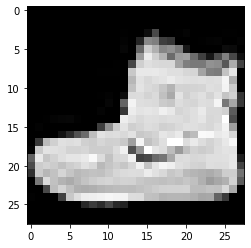

In [ ]:
plt.imshow(xtrain[0],cmap='gray') #0-255

In [ ]:
xtrain=xtrain/255.0
xtest=xtest/255.0

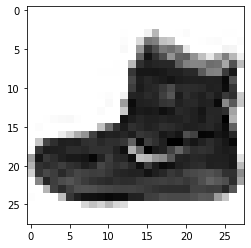

In [ ]:
plt.imshow(xtrain[0],cmap=plt.cm.binary)

In [ ]:
plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(5,4,i+1)
  plt.imshow(xtrain[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[ytrain[i]])
  plt.xticks([])
  plt.yticks([])

In [ ]:
#input layer 28X28 ->784

In [ ]:
model=tf.keras.models.Sequential([
                      tf.keras.layers.Flatten(input_shape=(28,28)),
                      tf.keras.layers.Dense(128,activation='relu'),
                      tf.keras.layers.Dense(10)
])
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(xtrain,ytrain,epochs=25)

In [ ]:
train_loss,train_acc=model.evaluate(xtrain,ytrain)
print("Training accuracy is {} with Training Loss {}".format(train_acc,train_loss))

In [ ]:
test_loss,test_acc=model.evaluate(xtest,ytest)
print("Training accuracy is {} with Training Loss {}".format(test_acc,test_loss))

In [ ]:
#added one layer to convert logits or score of each neuron to probability
probability_model=tf.keras.Sequential([model,
                                       tf.keras.layers.Softmax()])

In [ ]:
pred=probability_model.predict(xtest)

In [ ]:
pred[0]

In [ ]:
np.argmax(pred[0]),class_names[np.argmax(pred[0])]

(9, 'Ankle boot')

In [ ]:
ytest[0],class_names[ytest[0]]

(9, 'Ankle boot')

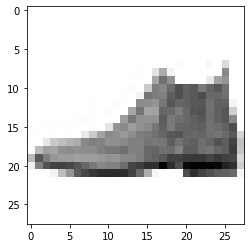

In [ ]:
plt.imshow(xtest[0],cmap=plt.cm.binary)

In [ ]:
#plot image with its label 
def plot_image(i,pred,xtest,ytest):
  img=xtest[i]
  actual=ytest[i]
  predicted=np.argmax(pred[i])
  plt.imshow(img,cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  if actual==predicted:
    color='g'
  else:
    color='r'
  plt.xlabel("{} with prob {:.2f}%".format(class_names[predicted],100*np.max(pred[i])),color=color)

In [ ]:
plot_image(3,pred,xtest,ytest)

In [ ]:
def plot_prob(i,pred,ytest):
  predicted=np.argmax(pred[i])
  actual=ytest[i]
  bplot=plt.bar(range(10),pred[i],color='y')
  plt.xticks(range(10))
  plt.yticks([])
  bplot[predicted].set_color('r')
  bplot[actual].set_color('g')

In [ ]:
plot_prob(10,pred,ytest)

In [ ]:
plt.figure(figsize=(7,3))
plt.subplot(1,2,1)
plot_image(10,pred,xtest,ytest)
plt.subplot(1,2,2)
plot_prob(10,pred,ytest)

In [ ]:
r=4
c=4
n=r*c
plt.figure(figsize=(3*2*c,2*r))
for i in range(n):
  plt.subplot(r,2*c,2*i+1)
  plot_image(i,pred,xtest,ytest)
  plt.subplot(r,2*c,2*i+2)
  plot_prob(i,pred,ytest)